<a href="https://colab.research.google.com/github/BrajanNieto/n-queens/blob/main/IA_Fundamentals_NQueensProblem_BrajanNieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IA Fundamentals - N Queens Problem**

---



*   The N-Queens problem involves placing N queens on an N×N chessboard such that no two queens can attack each other.

### Application of Hill Climbing and Simulated Annealing in the N-Queens Problem

**Professor:**  
Mg. Machaca Vicente Arceda  
[vicente.machaca.a@gmail.com](mailto:jcaballero@utec.edu.pe)

**Autor:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

---


**N-Queens Overview**

The N-Queens problem is a classic combinatorial challenge where the objective is to place N queens on an N×N chessboard such that no two queens can attack each other. This means ensuring that no two queens share the same row, column, or diagonal. The problem has been a significant topic in computer science and AI, serving as an example for constraint satisfaction and optimization techniques.

**Algorithms Overview**
* **1. Backtracking (Brute Force):** An algorithm that systematically searches for a solution by exploring all possible configurations and backtracks whenever a configuration fails to meet the conditions. It is used to find solutions that satisfy all constraints.

* **2. Random Search:** An algorithm that searches for a solution by randomly attempting placements and checks if they meet the conditions. If a placement satisfies all constraints, it is validated.


*   **3. Hill Climbing:** Starts with a random solution and iteratively makes the best local move until no better move is available. Prone to getting stuck in local optima.

*   **4. Simulated Annealing:** Simulates the annealing process in metallurgy. By allowing random moves that may temporarily worsen the solution, it seeks to overcome local optima and find a global solution.

### <b>0. Libraries, Functions for Graphing, etc. </b>

**Libraries**

In [6]:
#Libraries to be used
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

**Fuctions for Graphing**

In [2]:
#Chessboard plottting
def imprimir_tablero_grafico(solucion):
    n = len(solucion)
    tablero = np.zeros((n, n))

    # Place the queens on the board
    for i in range(n):
        tablero[i, solucion[i]] = 1

    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(n+1)-0.5, minor=True)
    ax.set_yticks(np.arange(n+1)-0.5, minor=True)
    ax.grid(which="minor", color="black", linewidth=2)
    ax.tick_params(which="minor", size=0)
    # Draw the chessboard pattern
    ax.imshow([[1 if (i + j) % 2 == 0 else 0 for j in range(n)] for i in range(n)], cmap="gray")

    # Draw the queens
    for i in range(n):
        ax.text(solucion[i], i, '♛', ha='center', va='center', fontsize=30, color='chocolate')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [3]:
#Plots creation for time comparison
def generar_tabla_y_graficos(df):
    # Configure the plots
    plt.figure(figsize=(15, 5))

    # Plot 1: Total solutions vs N
    plt.subplot(1, 3, 1)
    plt.plot(df['N'], df['Total de soluciones'], marker='o', linestyle='-', color='b')
    plt.title('Total de Soluciones vs N')
    plt.xlabel('N')
    plt.ylabel('Total de soluciones')
    plt.grid(True)

    # Plot 2: Unique solutions vs N
    plt.subplot(1, 3, 2)
    plt.plot(df['N'], df['Soluciones únicas'], marker='s', linestyle='-', color='g')
    plt.title('Soluciones Únicas vs N')
    plt.xlabel('N')
    plt.ylabel('Soluciones únicas')
    plt.grid(True)

    # Plot 3: Execution time vs N
    plt.subplot(1, 3, 3)
    plt.plot(df['N'], df['Tiempo de ejecución (s)'], marker='^', linestyle='-', color='r')
    plt.title('Tiempo de Ejecución vs N')
    plt.xlabel('N')
    plt.ylabel('Tiempo de ejecución (s)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### <b>1.1 Brute Force - All Solutions </b> (Solves the problem by trying all possible arrangements.)

In [ ]:
# N-Queens Solver by BackTracking
def solve_n_reinas_backtrack(n):
    soluciones = []
    tablero = [-1] * n

    def es_valido(fila, columna):  # Check if the position is valid
        for i in range(fila):
            if (tablero[i] == columna or
                tablero[i] - i == columna - fila or
                tablero[i] + i == columna + fila):
                return False
        return True

    def colocar_reina(fila):
        if fila == n:
            soluciones.append(tablero.copy()) # Store the solution
        else:
            for columna in range(n):
                if es_valido(fila, columna):
                    tablero[fila] = columna
                    colocar_reina(fila + 1)
                    tablero[fila] = -1 # Reset position

    colocar_reina(0)
    return soluciones

In [ ]:
# Counting unique solutions based on transformations
def contar_soluciones_unicas(soluciones):
    soluciones_unicas = []
    for solucion in soluciones:
        # Generate all symmetrical transformations of the solution
        transformaciones = generar_transformaciones(solucion)
        # Convert transformations to tuples to store them in a list
        transformaciones_tuplas = [tuple(t) for t in transformaciones]
        # Check if any of the transformations are already in unique solutions
        if not any(t in soluciones_unicas for t in transformaciones_tuplas):
            soluciones_unicas.append(tuple(solucion))
    return len(soluciones_unicas)

# Generate all symmetrical transformations of a solution
def generar_transformaciones(solucion):
    n = len(solucion)
    transformaciones = []
    # Transformation functions
    def rotar_90(sol):
        return [n - 1 - sol.index(i) for i in range(n)]
    def rotar_180(sol):
        return [n - 1 - i for i in sol[::-1]]
    def rotar_270(sol):
        return [sol.index(n - 1 - i) for i in range(n)]
    def reflejar_horizontal(sol):
        return sol[::-1]
    def reflejar_vertical(sol):
        return [n - 1 - i for i in sol]
    def reflejar_diagonal(sol):
        return [sol.index(i) for i in range(n)]
    def reflejar_antidiagonal(sol):
        return [n - 1 - sol.index(n - 1 - i) for i in range(n)]
    # List of all transformations
    transformaciones.append(solucion)
    transformaciones.append(rotar_90(solucion))
    transformaciones.append(rotar_180(solucion))
    transformaciones.append(rotar_270(solucion))
    transformaciones.append(reflejar_horizontal(solucion))
    transformaciones.append(reflejar_vertical(solucion))
    transformaciones.append(reflejar_diagonal(solucion))
    transformaciones.append(reflejar_antidiagonal(solucion))
    return transformaciones

In [ ]:
#Testing for 6x6 chessboard
n = 6
soluciones_bt8 = solve_n_reinas_backtrack(n)
soluciones_unicas_bt8 = contar_soluciones_unicas(soluciones_bt8)

print(f"\nSe encontraron {len(soluciones_bt8)} soluciones y {soluciones_unicas_bt8} soluciones únicas para un tablero de tamaño {n}x{n} ")


Se encontraron 4 soluciones y 1 soluciones únicas para un tablero de tamaño 6x6 



Solución 1:


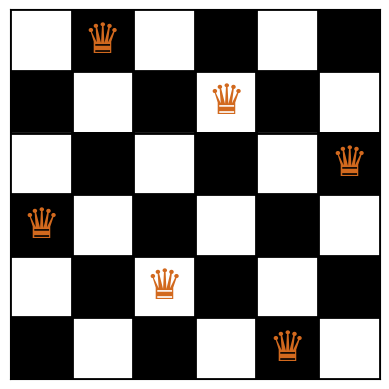


Solución 2:


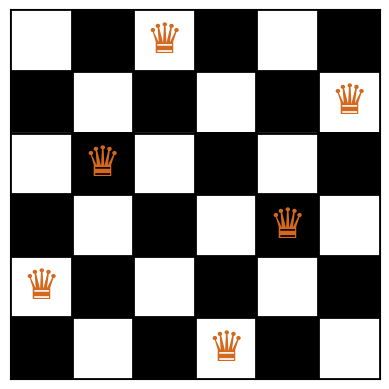


Solución 3:


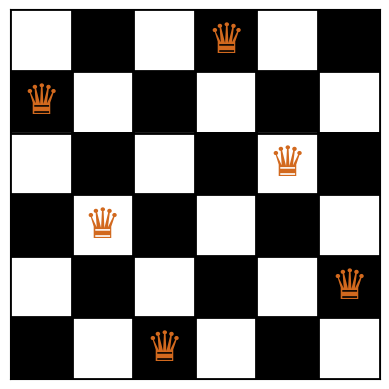


Solución 4:


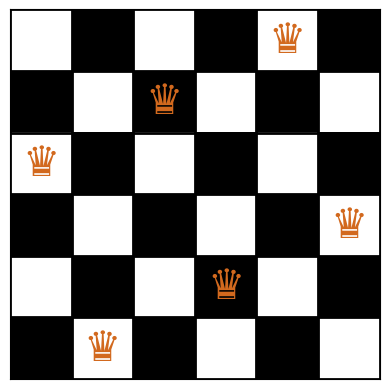

In [ ]:
#Print
'''for idx, solucion in enumerate(soluciones):
    print(f"\nSolución {idx + 1}:")
    for i in range(n):
        fila = ['.'] * n
        fila[solucion[i]] = 'Q'
        print(' '.join(fila))'''

for idx, solucion in enumerate(soluciones_bt8):
    print(f"\nSolución {idx + 1}:")
    imprimir_tablero_grafico(solucion)


In [ ]:
def tiempo_solucion(n_values):
    # List to store the data
    datos = []

    #print("{:<5} {:<20} {:<20} {:<20}".format('N', 'Total de soluciones', 'Soluciones únicas', 'Tiempo de ejecución (s)'))

    for n in n_values:
        start_time = time.time()
        soluciones = solve_n_reinas_backtrack(n)
        end_time = time.time()

        total_solutions = len(soluciones)
        unique_solutions = contar_soluciones_unicas(soluciones)
        execution_time = end_time - start_time

        #print("{:<5} {:<20} {:<20} {:<20.4f}".format(n, total_solutions, unique_solutions, execution_time))

        # Agregar los datos a la lista
        datos.append({
            'N': n,
            'Total de soluciones': total_solutions,
            'Soluciones únicas': unique_solutions,
            'Tiempo de ejecución (s)': execution_time
        })

    return datos


In [ ]:
# Values of N for which you want to calculate the solutions
n_valores = [2, 3, 4, 5, 6, 8, 9,10,11,12,13,14]

# Generate the data
datos_generados = tiempo_solucion(n_valores)
tiempos_tabla = pd.DataFrame(datos_generados)
print(tiempos_tabla)


     N  Total de soluciones  Soluciones únicas  Tiempo de ejecución (s)
0    2                    0                  0                 0.000017
1    3                    0                  0                 0.000021
2    4                    2                  1                 0.000101
3    5                   10                  2                 0.000271
4    6                    4                  1                 0.001091
5    8                   92                 12                 0.022574
6    9                  352                 46                 0.070072
7   10                  724                 92                 0.378539
8   11                 2680                341                 3.225776
9   12                14200               1787                13.155946
10  13                73712               9233                88.821188
11  14               365596              45752               577.540295


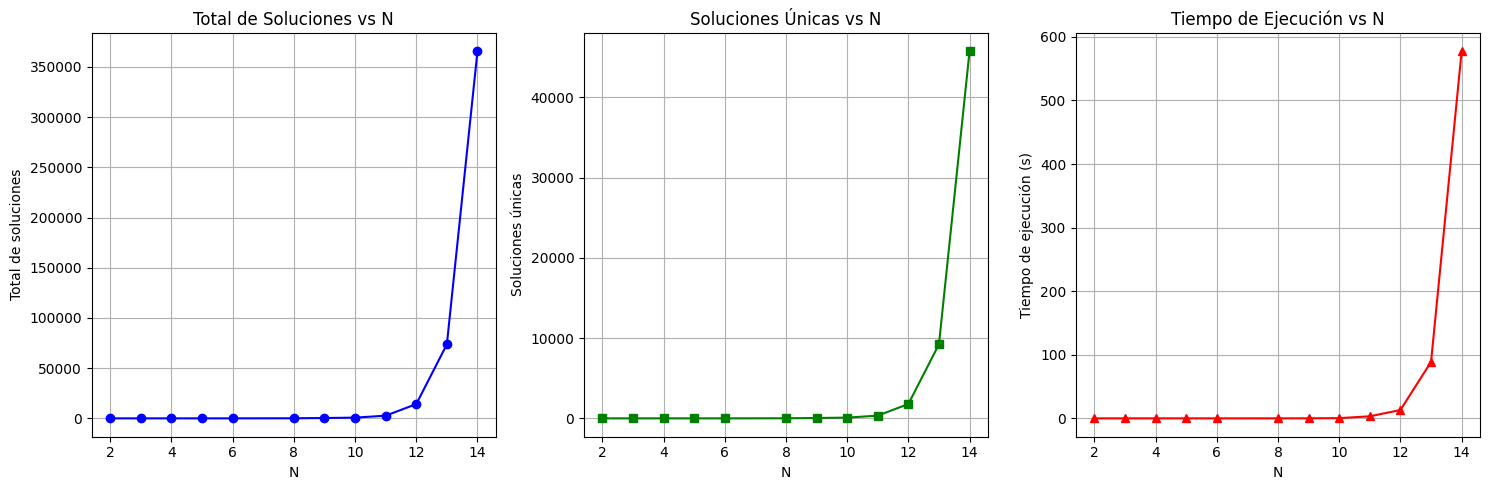

In [ ]:
# Create graphs to compare execution times and solutions for different chessboard sizes
generar_tabla_y_graficos(tiempos_tabla)

### <b>1.2 Brute Force - Back Tracking </b> (Solves the problem by trying all possible arrangements until the first valid solution is found.)

In [4]:
#Backtracking (Brute Force): An algorithm that systematically searches for a solution by exploring all configurations in order.
def solve_n_queens_una_solucion(n):
    solucion = []
    tablero = [-1] * n
    encontrado = False

    def es_valido(fila, columna):
        for i in range(fila):
            if (tablero[i] == columna or
                tablero[i] - i == columna - fila or
                tablero[i] + i == columna + fila):
                return False
        return True

    def colocar_reina(fila):
        nonlocal encontrado
        if encontrado:
            return
        if fila == n:
            solucion.extend(tablero.copy())
            encontrado = True
        else:
            for columna in range(n):
                if es_valido(fila, columna):
                    tablero[fila] = columna
                    colocar_reina(fila + 1)
                    tablero[fila] = -1

    colocar_reina(0)
    return solucion if solucion else None


[0, 4, 7, 5, 2, 6, 1, 3]


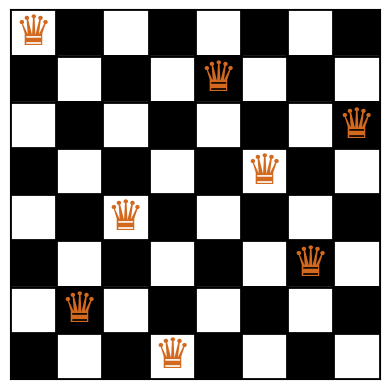

In [ ]:
#Testing backtracking for 8x8 chessboard
m=8
solucion_bt8 = solve_n_queens_una_solucion(m)
print(solucion_bt8)

imprimir_tablero_grafico(solucion_bt8)

### <b>2. Brute Force - Random Algorithm </b> (An algorithm that searches for a solution by randomly attempting placements and checks if they meet the conditions.)

In [9]:
#Random Search: An algorithm that searches for a solution by randomly attempting placements and checks if they meet the conditions.
def solve_n_queens_random(n, max_intentos=1000000):
    for _ in range(max_intentos):
        tablero = [random.randint(0, n - 1) for _ in range(n)]
        if es_solucion(tablero):
            return tablero
    return None

def es_solucion(tablero):
    n = len(tablero)
    for i in range(n):
        for j in range(i + 1, n):
            if (tablero[i] == tablero[j] or
                abs(tablero[i] - tablero[j]) == abs(i - j)):
                return False
    return True

[2, 5, 1, 4, 7, 0, 6, 3]


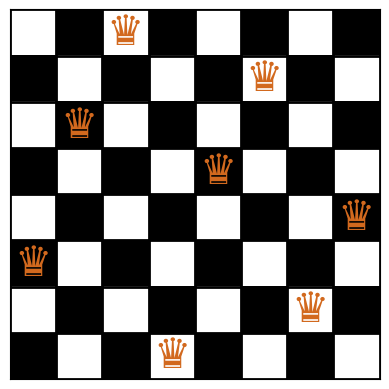

In [ ]:
#Testing for 8x8 chessboard
m = 8
solucion_rand8 = solve_n_queens_random(m)
print(solucion_rand8)
imprimir_tablero_grafico(solucion_rand8)


### <b>2. Hill Climbing </b> (Solves the problem by starting with an initial solution and iteratively making the best local change to improve it.)

In [3]:
#Hill Climbing: Starts with a random solution and iteratively makes the best local move until no better move is available
def heuristica(tablero):
    conflictos = 0
    n = len(tablero)
    for i in range(n):
        for j in range(i + 1, n):
            if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                conflictos += 1
    return conflictos

def generate_neighbors(tablero):
    vecinos = []
    n = len(tablero)
    for fila in range(n):
        for columna in range(n):
            if columna != tablero[fila]:
                vecino = tablero.copy()
                vecino[fila] = columna
                vecinos.append(vecino)
    return vecinos

def solve_n_reinas_hill_climbing(n, max_intentos=100):
    intentos = 0
    mejor_solucion = None
    menor_conflicto = float('inf')

    while intentos < max_intentos:
        # Firs random chessboard
        x = [random.randint(0, n - 1) for _ in range(n)]
        E = heuristica(x)
        mejorado = True

        while mejorado:
            mejorado = False
            vecinos = generate_neighbors(x)
            E_actual = E
            for vecino in vecinos:
                E_vecino = heuristica(vecino)
                if E_vecino < E_actual:
                    x = vecino
                    E_actual = E_vecino
                    mejorado = True
            E = E_actual

        # Actualizar mejor solución encontrada
        if E < menor_conflicto:
            menor_conflicto = E
            mejor_solucion = x.copy()

        # Si se encuentra una solución sin conflictos, se retorna inmediatamente
        if E == 0:
            print("Solución encontrada en el intento", intentos + 1)
            return mejor_solucion, menor_conflicto

        intentos += 1

    print("No se encontró solución sin conflictos después de", intentos, "intentos.")
    return mejor_solucion, menor_conflicto  # Retorna la mejor solución encontrada y sus conflictos


Solución encontrada en el intento 10
Mejor solución encontrada: [6, 1, 3, 0, 7, 4, 2, 5]
Conflictos en la mejor solución: 0


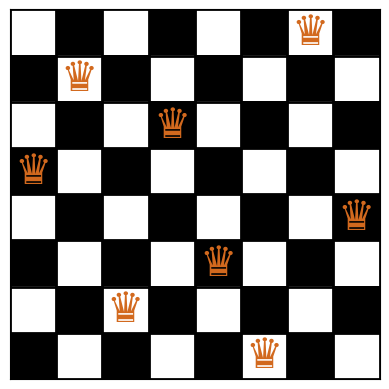

In [ ]:
#Testing hill climbing for 8x8 chessboard
m = 8
solucion_hc8, conflictos_hc8 = solve_n_reinas_hill_climbing(m)
print("Mejor solución encontrada:", solucion_hc8)
print("Conflictos en la mejor solución:", conflictos_hc8)
imprimir_tablero_grafico(solucion_hc8)

### <b>3. Simulated Annealing </b> (Solves the problem by exploring solutions and occasionally accepting worse solutions to escape local optima, gradually reducing the probability of such moves over time to find a global solution.t.)

In [4]:
def heuristica(tablero):
    conflictos = 0
    n = len(tablero)
    for i in range(n):
        for j in range(i + 1, n):
            if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                conflictos += 1
    return conflictos

def random_neighbor(tablero):
    n = len(tablero)
    fila = random.randint(0, n - 1)  # Selecciona una fila aleatoria
    columnas = list(range(n))
    columnas.remove(tablero[fila])  # Remueve la columna actual de esa fila
    columna = random.choice(columnas)  # Selecciona una nueva columna para esa reina
    nuevo_tablero = tablero.copy()
    nuevo_tablero[fila] = columna
    return nuevo_tablero

def accept(delta, T):
    if delta < 0:
        return True
    else:
        r = random.uniform(0, 1)
        if r < np.exp(-delta / T):
            return True
        else:
            return False

def solve_n_reinas_simulated_annealing(n, T_max=1000, T_min=1e-5, cooling_rate=0.99, max_intentos=100):
    intentos = 0
    mejor_solucion = None
    menor_conflicto = float('inf')

    while intentos < max_intentos:
        T = T_max
        # Inicializa el tablero con una reina en cada fila, en una columna aleatoria
        x = [random.randint(0, n - 1) for _ in range(n)]
        E = heuristica(x)

        # Actualiza la mejor solución inicial
        if E < menor_conflicto:
            mejor_solucion = x.copy()
            menor_conflicto = E

        while T > T_min:
            x_new = random_neighbor(x)
            E_new = heuristica(x_new)
            delta = E_new - E

            if accept(delta, T):
                x = x_new
                E = E_new

                # Actualiza la mejor solución si es mejor que la anterior
                if E < menor_conflicto:
                    mejor_solucion = x.copy()
                    menor_conflicto = E

            if E == 0:
                print("Solución encontrada en intento", intentos + 1)
                return mejor_solucion, menor_conflicto  # Solución encontrada

            T = T * cooling_rate

        intentos += 1

    print("No se encontró solución sin conflictos después de", intentos, "intentos.")
    return mejor_solucion, menor_conflicto  # Retorna la mejor solución encontrada y sus conflictos

Solución encontrada en intento 2
Mejor solución encontrada: [3, 1, 7, 4, 6, 0, 2, 5]
Conflictos en la mejor solución: 0


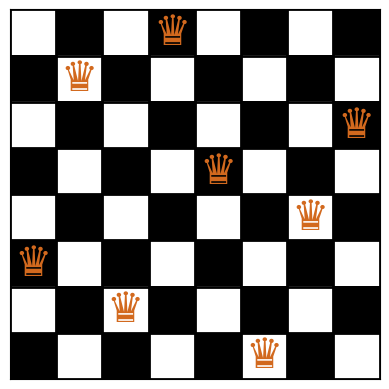

In [ ]:
#Testing simulated annealing for 8x8 chessboard
m = 8
solucion_sa8, conflictos_sa8 = solve_n_reinas_simulated_annealing(m)
print("Mejor solución encontrada:", solucion_sa8)
print("Conflictos en la mejor solución:", conflictos_sa8)
imprimir_tablero_grafico(solucion_sa8)

### <b>4. Execution Time Efficiency </b> (Analysis of results and the time efficiency of the presented algorithms)

In [11]:
# List of n values
n_values = [ 3, 4, 5, 6, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

# Ini list bt, rnd, hc and sa
times_backtracking = []
times_random = []
times_hill_climbing = []
conflicts_hill_climbing = []
times_simulated_annealing = []
conflicts_simulated_annealing = []

# Execution for each n
for n in n_values:
    print(f"Ejecutando algoritmos para n = {n}")

    # Backtracking
    try:
        start_time = time.perf_counter()
        solucion_bt = solve_n_queens_una_solucion(n)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        if solucion_bt is not None:
            times_backtracking.append(elapsed_time)
        else:
            times_backtracking.append(None)
    except Exception as e:
        times_backtracking.append(None)

    # Random
    try:
        start_time = time.perf_counter()
        solucion_rand = solve_n_queens_random(n)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        if solucion_rand is not None:
            times_random.append(elapsed_time)
        else:
            times_random.append(None)
    except Exception as e:
        times_random.append(None)

    # Hill Climbing
    try:
        start_time = time.perf_counter()
        solucion_hc, conflictos_hc = solve_n_reinas_hill_climbing(n)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        if solucion_hc is not None:
            times_hill_climbing.append(elapsed_time)
            conflicts_hill_climbing.append(conflictos_hc)
        else:
            times_hill_climbing.append(None)
            conflicts_hill_climbing.append(None)
    except Exception as e:
        times_hill_climbing.append(None)
        conflicts_hill_climbing.append(None)

    # Simulated Annealing
    try:
        start_time = time.perf_counter()
        solucion_sa, conflictos_sa = solve_n_reinas_simulated_annealing(n)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        if solucion_sa is not None:
            times_simulated_annealing.append(elapsed_time)
            conflicts_simulated_annealing.append(conflictos_sa)
        else:
            times_simulated_annealing.append(None)
            conflicts_simulated_annealing.append(None)
    except Exception as e:
        times_simulated_annealing.append(None)
        conflicts_simulated_annealing.append(None)

# Results DF
data = {
    'n': n_values,
    'Time_Backtracking': times_backtracking,
    'Time_Random': times_random,
    'Time_HillClimbing': times_hill_climbing,
    'Conflicts_HillClimbing': conflicts_hill_climbing,
    'Time_SimulatedAnnealing': times_simulated_annealing,
    'Conflicts_SimulatedAnnealing': conflicts_simulated_annealing
}

df = pd.DataFrame(data)

# DF
print("\nResultados:")
print(df)

Ejecutando algoritmos para n = 3
No se encontró solución sin conflictos después de 100 intentos.
No se encontró solución sin conflictos después de 100 intentos.
Ejecutando algoritmos para n = 4
Solución encontrada en el intento 2
Solución encontrada en intento 1
Ejecutando algoritmos para n = 5
Solución encontrada en el intento 1
Solución encontrada en intento 1
Ejecutando algoritmos para n = 6
Solución encontrada en el intento 23
Solución encontrada en intento 1
Ejecutando algoritmos para n = 8
Solución encontrada en el intento 1
Solución encontrada en intento 1
Ejecutando algoritmos para n = 9
Solución encontrada en el intento 1
Solución encontrada en intento 1
Ejecutando algoritmos para n = 10
Solución encontrada en el intento 31
Solución encontrada en intento 1
Ejecutando algoritmos para n = 11
Solución encontrada en el intento 30
Solución encontrada en intento 2
Ejecutando algoritmos para n = 12
Solución encontrada en el intento 66
Solución encontrada en intento 1
Ejecutando algor

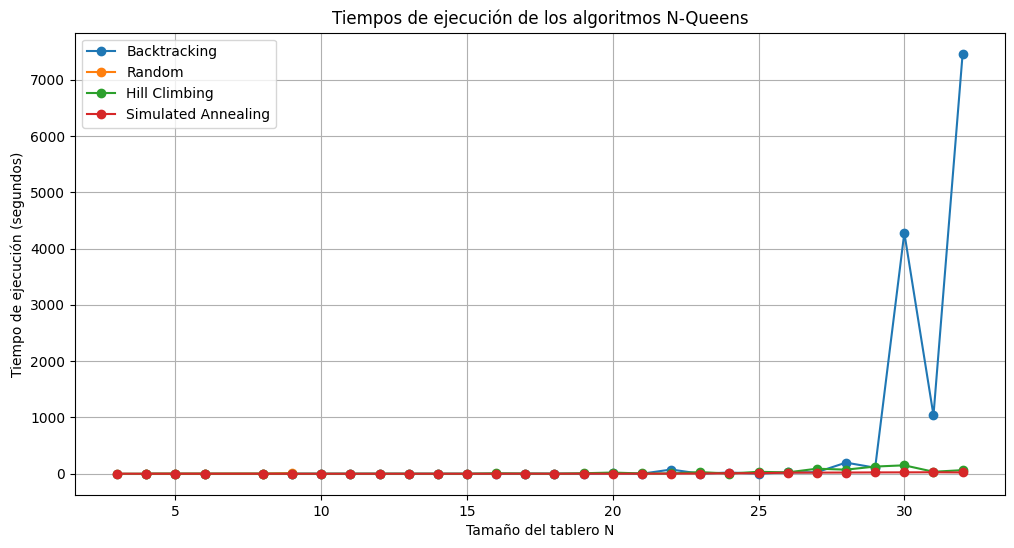

In [12]:
# Asegurarse de que los tiempos sean numéricos y manejar valores None
df_plot = df.copy()
df_plot.replace({None: np.nan}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df_plot['n'], df_plot['Time_Backtracking'], marker='o', label='Backtracking')
plt.plot(df_plot['n'], df_plot['Time_Random'], marker='o', label='Random')
plt.plot(df_plot['n'], df_plot['Time_HillClimbing'], marker='o', label='Hill Climbing')
plt.plot(df_plot['n'], df_plot['Time_SimulatedAnnealing'], marker='o', label='Simulated Annealing')

plt.xlabel('Tamaño del tablero N')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempos de ejecución de los algoritmos N-Queens')
plt.legend()
plt.grid(True)
plt.show()


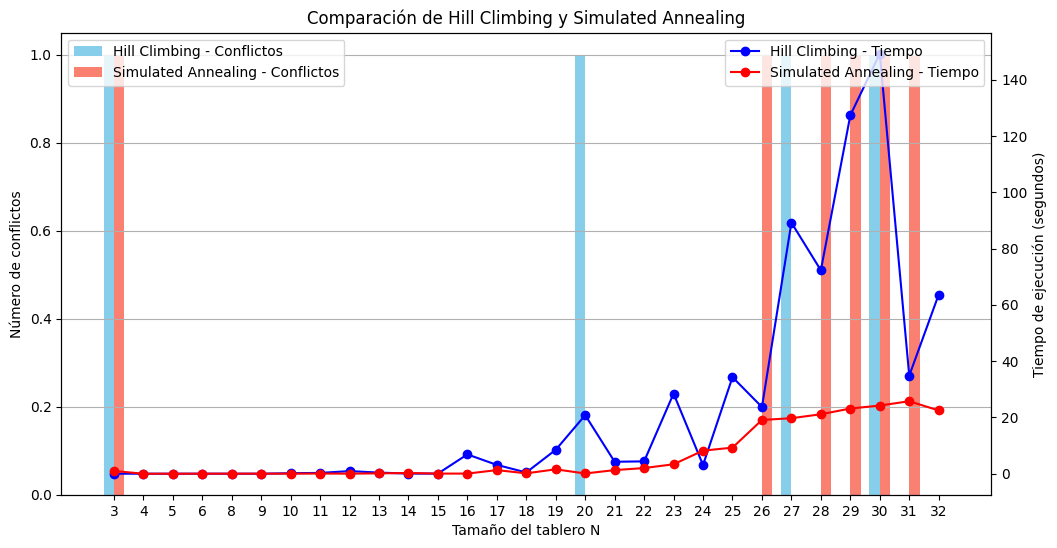

In [13]:
df_plot = df.copy()
df_plot.replace({None: np.nan}, inplace=True)

# Configurar la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configurar el eje X
n = df_plot['n']
ind = np.arange(len(n))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

# Barras para la cantidad de conflictos
conflicts_hc = df_plot['Conflicts_HillClimbing']
conflicts_sa = df_plot['Conflicts_SimulatedAnnealing']

ax1.bar(ind - width/2, conflicts_hc, width, label='Hill Climbing - Conflictos', color='skyblue')
ax1.bar(ind + width/2, conflicts_sa, width, label='Simulated Annealing - Conflictos', color='salmon')

ax1.set_xlabel('Tamaño del tablero N')
ax1.set_ylabel('Número de conflictos')
ax1.set_title('Comparación de Hill Climbing y Simulated Annealing')
ax1.set_xticks(ind)
ax1.set_xticklabels(n)
ax1.legend(loc='upper left')
ax1.grid(True, axis='y')

# Crear un segundo eje Y para los tiempos de ejecución
ax2 = ax1.twinx()

# Líneas para los tiempos de ejecución
time_hc = df_plot['Time_HillClimbing']
time_sa = df_plot['Time_SimulatedAnnealing']

ax2.plot(ind, time_hc, marker='o', color='blue', label='Hill Climbing - Tiempo')
ax2.plot(ind, time_sa, marker='o', color='red', label='Simulated Annealing - Tiempo')

ax2.set_ylabel('Tiempo de ejecución (segundos)')
ax2.legend(loc='upper right')

plt.show()

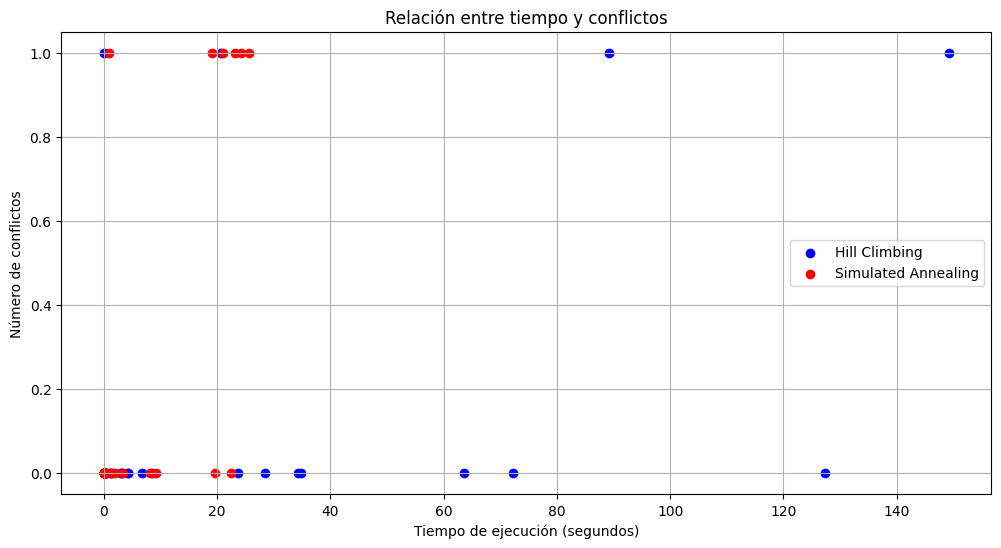

In [14]:
plt.figure(figsize=(12, 6))

# Hill Climbing
plt.scatter(df_plot['Time_HillClimbing'], df_plot['Conflicts_HillClimbing'], color='blue', label='Hill Climbing')

# Simulated Annealing
plt.scatter(df_plot['Time_SimulatedAnnealing'], df_plot['Conflicts_SimulatedAnnealing'], color='red', label='Simulated Annealing')

plt.xlabel('Tiempo de ejecución (segundos)')
plt.ylabel('Número de conflictos')
plt.title('Relación entre tiempo y conflictos')
plt.legend()
plt.grid(True)
plt.show()



In [15]:
df_plot['Success_Backtracking'] = df_plot['Time_Backtracking'].notna()
df_plot['Success_Random'] = df_plot['Time_Random'].notna()
df_plot['Success_HillClimbing'] = df_plot['Conflicts_HillClimbing'] == 0
df_plot['Success_SimulatedAnnealing'] = df_plot['Conflicts_SimulatedAnnealing'] == 0


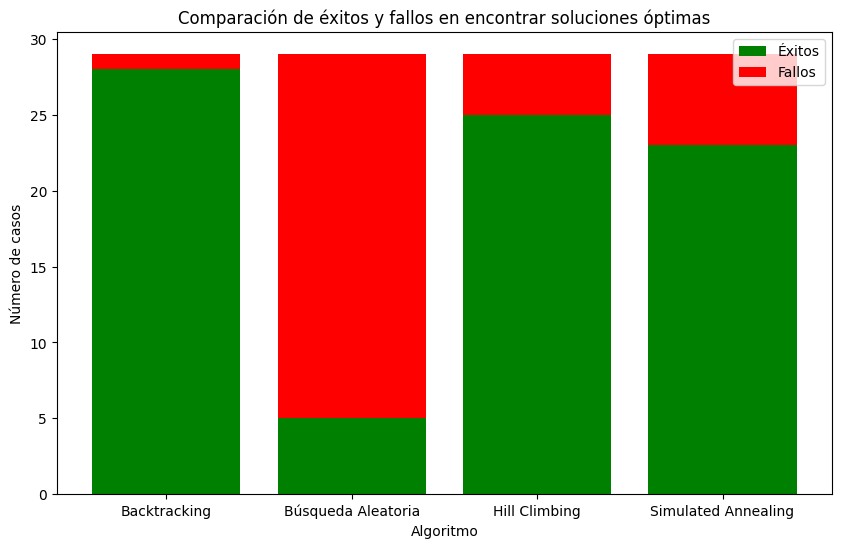

In [16]:
# Sumarizar el número de éxitos y fallos por algoritmo
success_data = {
    'Algoritmo': ['Backtracking', 'Búsqueda Aleatoria', 'Hill Climbing', 'Simulated Annealing'],
    'Éxitos': [
        df_plot['Success_Backtracking'].sum(),
        df_plot['Success_Random'].sum(),
        df_plot['Success_HillClimbing'].sum(),
        df_plot['Success_SimulatedAnnealing'].sum()
    ],
    'Fallos': [
        len(df_plot) - df_plot['Success_Backtracking'].sum(),
        len(df_plot) - df_plot['Success_Random'].sum(),
        len(df_plot) - df_plot['Success_HillClimbing'].sum(),
        len(df_plot) - df_plot['Success_SimulatedAnnealing'].sum()
    ]
}

df_success = pd.DataFrame(success_data)

# Crear la gráfica de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(df_success['Algoritmo'], df_success['Éxitos'], label='Éxitos', color='green')
plt.bar(df_success['Algoritmo'], df_success['Fallos'], bottom=df_success['Éxitos'], label='Fallos', color='red')

plt.xlabel('Algoritmo')
plt.ylabel('Número de casos')
plt.title('Comparación de éxitos y fallos en encontrar soluciones óptimas')
plt.legend()
plt.show()


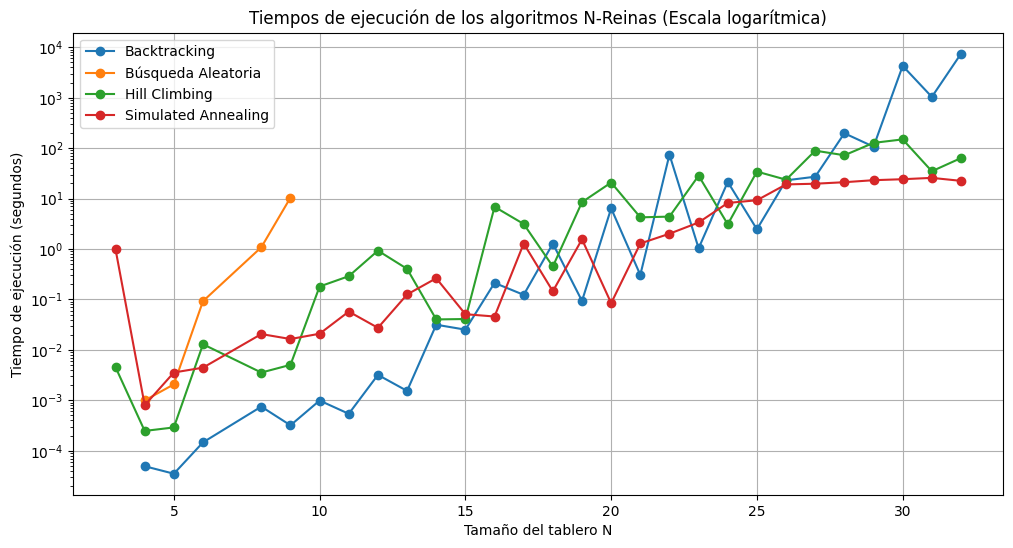

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df_plot['n'], df_plot['Time_Backtracking'], marker='o', label='Backtracking')
plt.plot(df_plot['n'], df_plot['Time_Random'], marker='o', label='Búsqueda Aleatoria')
plt.plot(df_plot['n'], df_plot['Time_HillClimbing'], marker='o', label='Hill Climbing')
plt.plot(df_plot['n'], df_plot['Time_SimulatedAnnealing'], marker='o', label='Simulated Annealing')

plt.xlabel('Tamaño del tablero N')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempos de ejecución de los algoritmos N-Reinas (Escala logarítmica)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


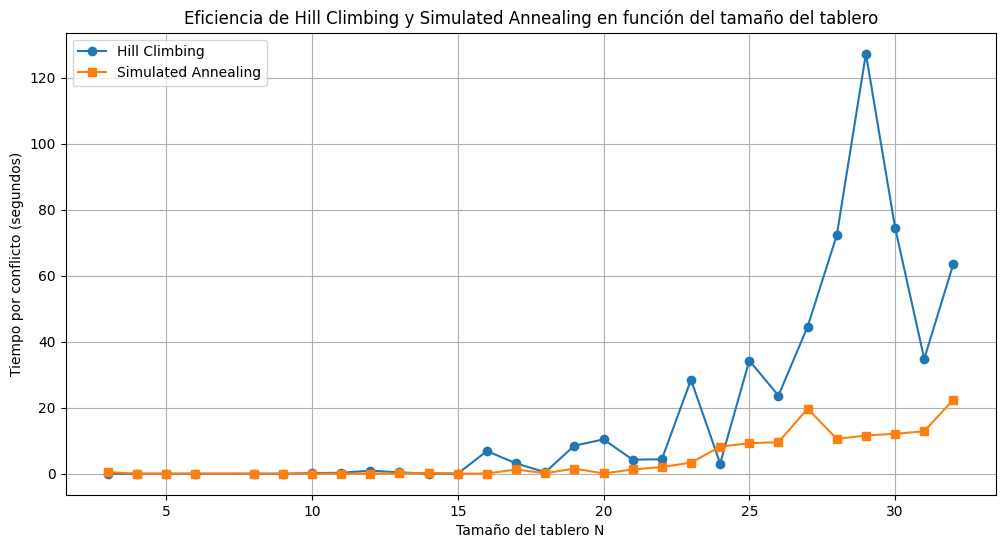

In [18]:
# Calcular tiempo por conflicto para ambos algoritmos
df_plot['TiempoPorConflicto_HillClimbing'] = df_plot['Time_HillClimbing'] / (df_plot['Conflicts_HillClimbing'] + 1)
df_plot['TiempoPorConflicto_SimulatedAnnealing'] = df_plot['Time_SimulatedAnnealing'] / (df_plot['Conflicts_SimulatedAnnealing'] + 1)

# Reemplazar valores None o infinitos por NaN para evitar problemas en la gráfica
df_plot.replace([np.inf, -np.inf, None], np.nan, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df_plot['n'], df_plot['TiempoPorConflicto_HillClimbing'], marker='o', label='Hill Climbing')
plt.plot(df_plot['n'], df_plot['TiempoPorConflicto_SimulatedAnnealing'], marker='s', label='Simulated Annealing')

plt.xlabel('Tamaño del tablero N')
plt.ylabel('Tiempo por conflicto (segundos)')
plt.title('Eficiencia de Hill Climbing y Simulated Annealing en función del tamaño del tablero')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Código para obtener detalles del entorno de ejecución en Google Colab
import os
import psutil
import tensorflow as tf

# Verificar tipo de dispositivo
print("\n=== Tipo de dispositivo ===")
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('Dispositivo: CPU')
else:
    gpu_info = tf.config.experimental.get_device_details(tf.config.experimental.list_physical_devices('GPU')[0])
    print('Dispositivo: GPU -', gpu_info['device_name'])

# Información de la memoria RAM
print("\n=== Memoria RAM ===")
with open('/proc/meminfo') as f:
    lines = f.readlines()
    for line in lines:
        if "MemTotal" in line or "MemAvailable" in line:
            print(line.strip())

# Almacenamiento disponible
print("\n=== Almacenamiento ===")
os.system('df -h /')

# Información de la GPU (si está presente)
if device_name == '/device:GPU:0':
    print("\n=== Detalles de la GPU ===")
    os.system('nvidia-smi')

# Información de la CPU
print("\n=== Información de la CPU ===")
os.system("cat /proc/cpuinfo | grep 'model name' | uniq")

# Número de núcleos de la CPU
print("\n=== Número de núcleos de la CPU ===")
os.system('nproc')



=== Tipo de dispositivo ===
Dispositivo: CPU

=== Memoria RAM ===
MemTotal:       13290460 kB
MemAvailable:   11479616 kB

=== Almacenamiento ===

=== Información de la CPU ===

=== Número de núcleos de la CPU ===


0

In [10]:
# List of n values
n_values = [ 3, 4, 5, 6, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]

# Ini list bt, rnd, hc and sa
times_hill_climbing = []
conflicts_hill_climbing = []
times_simulated_annealing = []
conflicts_simulated_annealing = []

# Execution for each n
for n in n_values:
    print(f"Ejecutando algoritmos para n = {n}")


    # Hill Climbing
    try:
        start_time = time.perf_counter()
        solucion_hc, conflictos_hc = solve_n_reinas_hill_climbing(n)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        if solucion_hc is not None:
            times_hill_climbing.append(elapsed_time)
            conflicts_hill_climbing.append(conflictos_hc)
        else:
            times_hill_climbing.append(None)
            conflicts_hill_climbing.append(None)
    except Exception as e:
        times_hill_climbing.append(None)
        conflicts_hill_climbing.append(None)

    # Simulated Annealing
    try:
        start_time = time.perf_counter()
        solucion_sa, conflictos_sa = solve_n_reinas_simulated_annealing(n)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        if solucion_sa is not None:
            times_simulated_annealing.append(elapsed_time)
            conflicts_simulated_annealing.append(conflictos_sa)
        else:
            times_simulated_annealing.append(None)
            conflicts_simulated_annealing.append(None)
    except Exception as e:
        times_simulated_annealing.append(None)
        conflicts_simulated_annealing.append(None)

# Results DF
data2 = {
    'n': n_values,
    'Time_HillClimbing': times_hill_climbing,
    'Conflicts_HillClimbing': conflicts_hill_climbing,
    'Time_SimulatedAnnealing': times_simulated_annealing,
    'Conflicts_SimulatedAnnealing': conflicts_simulated_annealing
}

df2 = pd.DataFrame(data2)

# DF
print("\nResultados:")
print(df2)

Ejecutando algoritmos para n = 3
No se encontró solución sin conflictos después de 100 intentos.
No se encontró solución sin conflictos después de 100 intentos.
Ejecutando algoritmos para n = 4
Solución encontrada en el intento 1
Solución encontrada en intento 1
Ejecutando algoritmos para n = 5
Solución encontrada en el intento 1
Solución encontrada en intento 1
Ejecutando algoritmos para n = 6
Solución encontrada en el intento 1
Solución encontrada en intento 1
Ejecutando algoritmos para n = 8
Solución encontrada en el intento 7
Solución encontrada en intento 1
Ejecutando algoritmos para n = 9
Solución encontrada en el intento 17
Solución encontrada en intento 1
Ejecutando algoritmos para n = 10
Solución encontrada en el intento 46
Solución encontrada en intento 6
Ejecutando algoritmos para n = 11
Solución encontrada en el intento 32
Solución encontrada en intento 2
Ejecutando algoritmos para n = 12
Solución encontrada en el intento 9
Solución encontrada en intento 4
Ejecutando algori

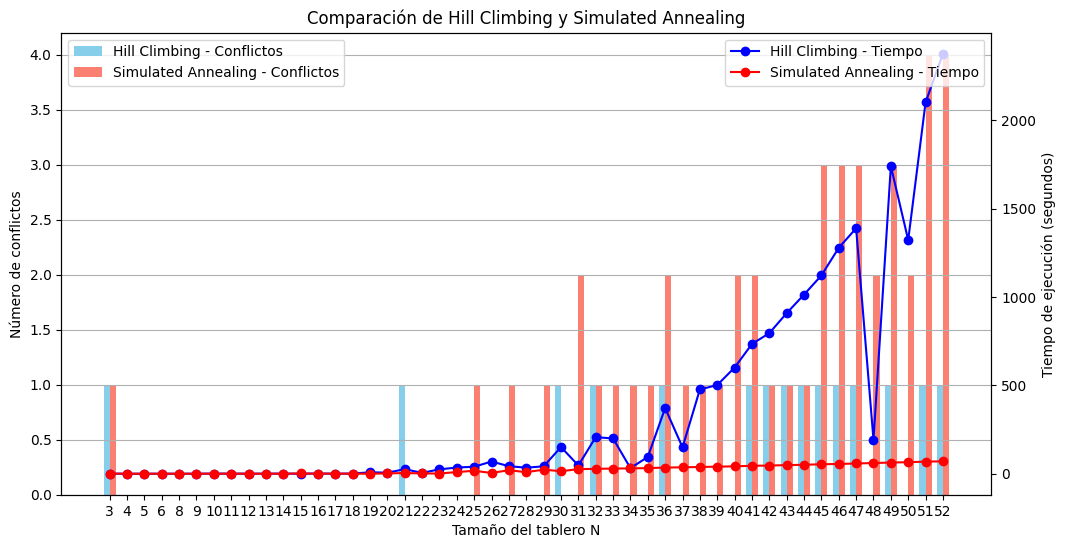

In [11]:
df_plot = df2.copy()
df_plot.replace({None: np.nan}, inplace=True)

# Configurar la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configurar el eje X
n = df_plot['n']
ind = np.arange(len(n))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

# Barras para la cantidad de conflictos
conflicts_hc = df_plot['Conflicts_HillClimbing']
conflicts_sa = df_plot['Conflicts_SimulatedAnnealing']

ax1.bar(ind - width/2, conflicts_hc, width, label='Hill Climbing - Conflictos', color='skyblue')
ax1.bar(ind + width/2, conflicts_sa, width, label='Simulated Annealing - Conflictos', color='salmon')

ax1.set_xlabel('Tamaño del tablero N')
ax1.set_ylabel('Número de conflictos')
ax1.set_title('Comparación de Hill Climbing y Simulated Annealing')
ax1.set_xticks(ind)
ax1.set_xticklabels(n)
ax1.legend(loc='upper left')
ax1.grid(True, axis='y')

# Crear un segundo eje Y para los tiempos de ejecución
ax2 = ax1.twinx()

# Líneas para los tiempos de ejecución
time_hc = df_plot['Time_HillClimbing']
time_sa = df_plot['Time_SimulatedAnnealing']

ax2.plot(ind, time_hc, marker='o', color='blue', label='Hill Climbing - Tiempo')
ax2.plot(ind, time_sa, marker='o', color='red', label='Simulated Annealing - Tiempo')

ax2.set_ylabel('Tiempo de ejecución (segundos)')
ax2.legend(loc='upper right')

plt.show()

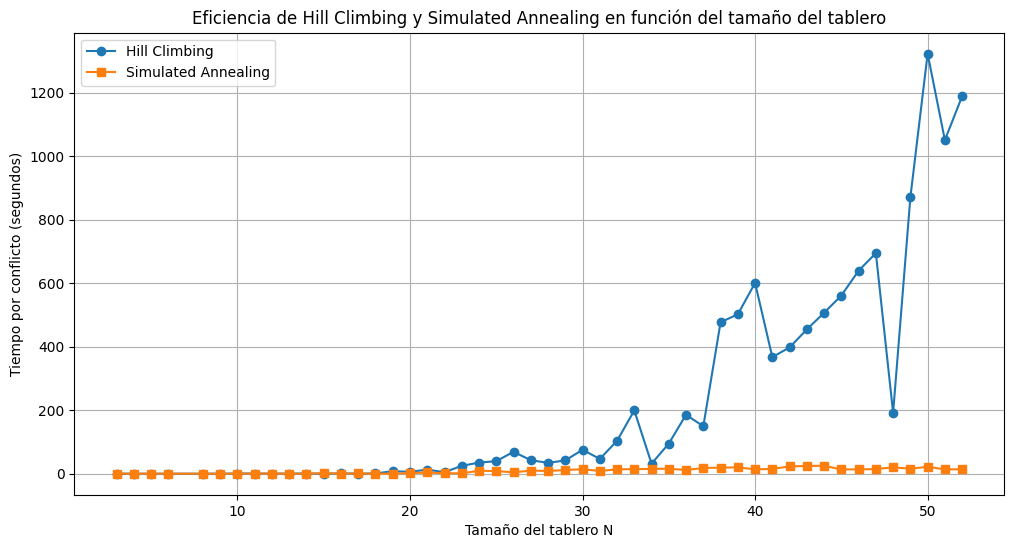

In [12]:
# Calcular tiempo por conflicto para ambos algoritmos
df_plot['TiempoPorConflicto_HillClimbing'] = df_plot['Time_HillClimbing'] / (df_plot['Conflicts_HillClimbing'] + 1)
df_plot['TiempoPorConflicto_SimulatedAnnealing'] = df_plot['Time_SimulatedAnnealing'] / (df_plot['Conflicts_SimulatedAnnealing'] + 1)

# Reemplazar valores None o infinitos por NaN para evitar problemas en la gráfica
df_plot.replace([np.inf, -np.inf, None], np.nan, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df_plot['n'], df_plot['TiempoPorConflicto_HillClimbing'], marker='o', label='Hill Climbing')
plt.plot(df_plot['n'], df_plot['TiempoPorConflicto_SimulatedAnnealing'], marker='s', label='Simulated Annealing')

plt.xlabel('Tamaño del tablero N')
plt.ylabel('Tiempo por conflicto (segundos)')
plt.title('Eficiencia de Hill Climbing y Simulated Annealing en función del tamaño del tablero')
plt.legend()
plt.grid(True)
plt.show()


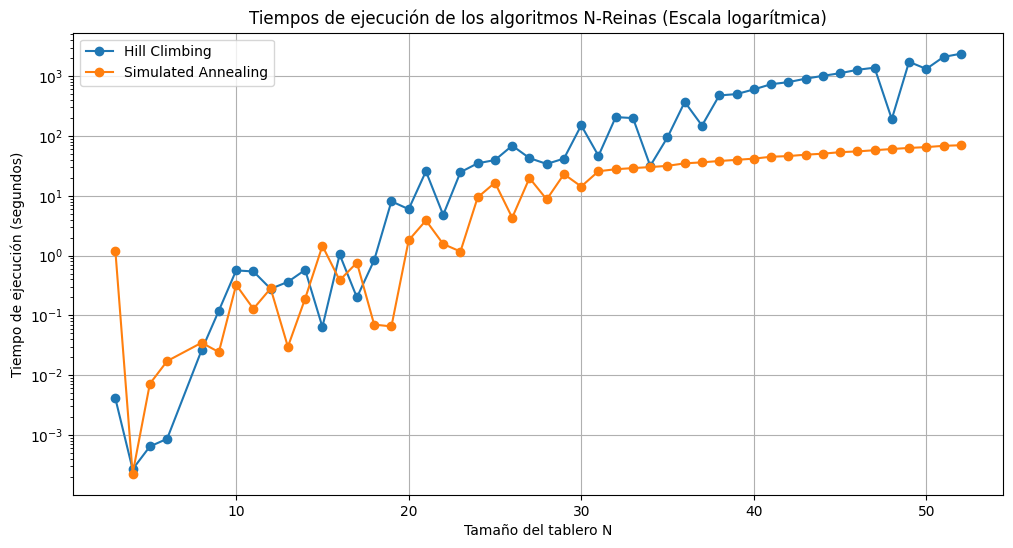

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(df_plot['n'], df_plot['Time_HillClimbing'], marker='o', label='Hill Climbing')
plt.plot(df_plot['n'], df_plot['Time_SimulatedAnnealing'], marker='o', label='Simulated Annealing')

plt.xlabel('Tamaño del tablero N')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempos de ejecución de los algoritmos N-Reinas (Escala logarítmica)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()